# Diabetes Prediction

### Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,2,138,62,35,0,33.6,0.127,47,1,0
1,0,135,68,42,250,42.3,0.365,24,1,3
2,0,173,78,32,265,46.5,1.159,58,0,5
3,4,99,72,17,0,25.6,0.294,28,0,6
4,8,194,80,0,0,26.1,0.551,67,0,7


In [3]:
df.Pregnancies.unique().sum()

137

In [4]:
df.shape

(1405, 10)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Id                          0
dtype: int64

In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
continuous_feat=[feature for feature in df.columns if df[feature].unique().sum()>25]
discrete_feat=[feature for feature in df.columns if feature not in continuous_feat]

In [8]:
print('continuous features =',continuous_feat)
print('Discrete features =',discrete_feat)

continuous features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Discrete features = ['Outcome']


<AxesSubplot:>

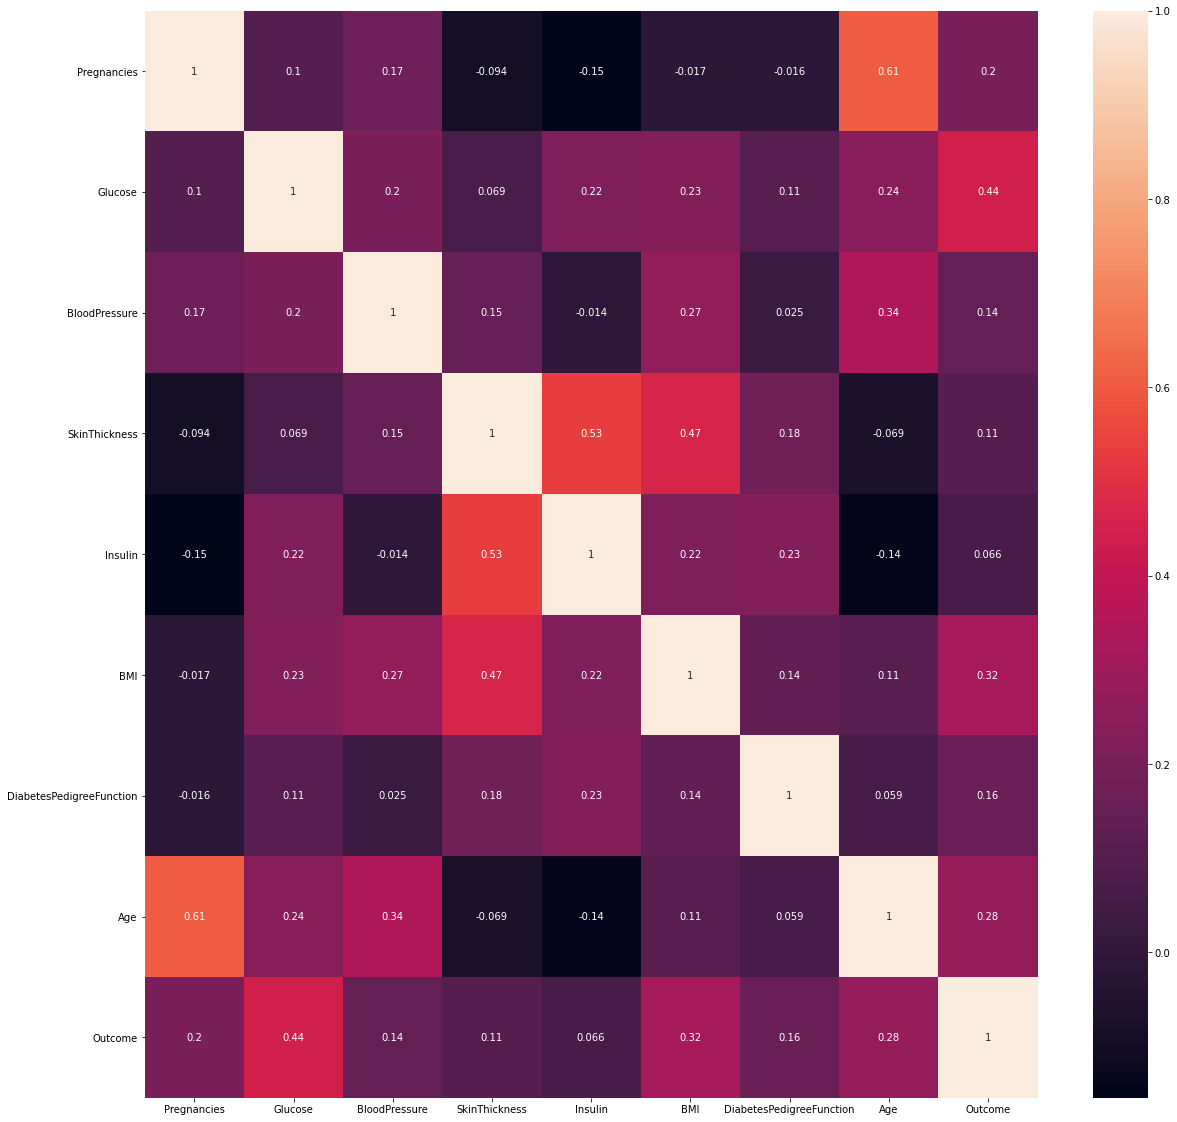

In [9]:
corrmat=df.corr(method="spearman")
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True)

In [10]:
features=[feature for feature in continuous_feat]
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

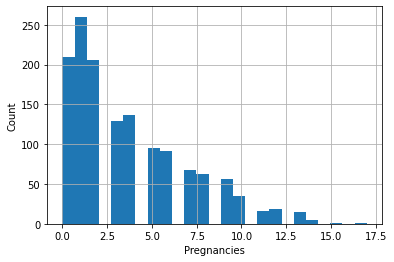

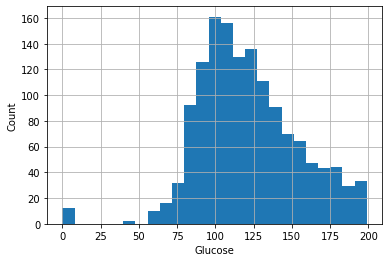

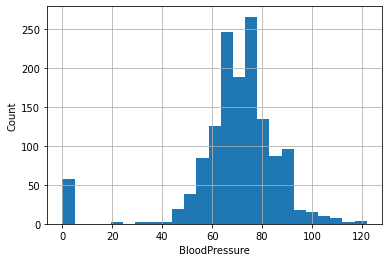

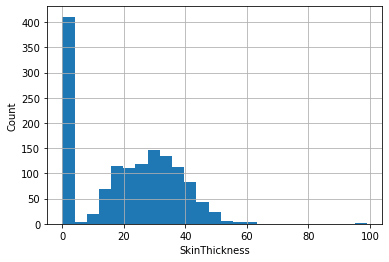

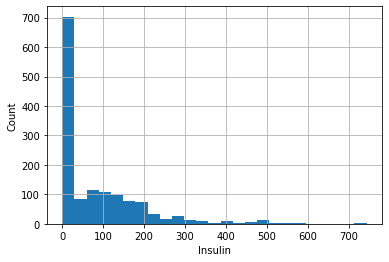

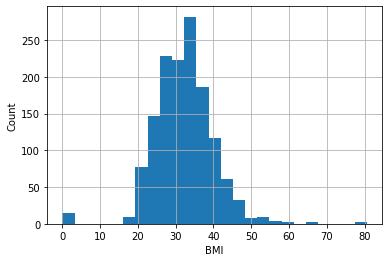

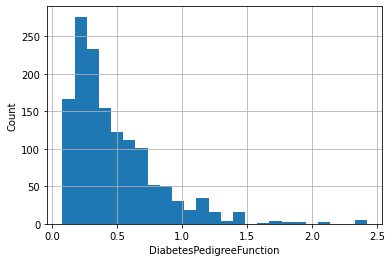

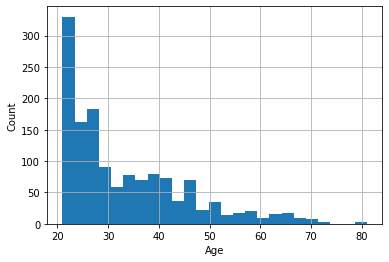

In [11]:
for ft in features:
    data=df.copy()
    data[ft].hist(bins=25)
    plt.xlabel(ft)
    plt.ylabel('Count')
    plt.show()

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

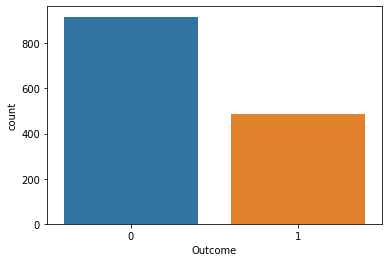

In [12]:
sns.countplot(df['Outcome'])

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


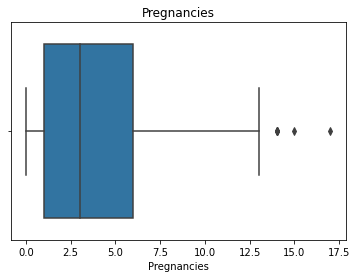

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


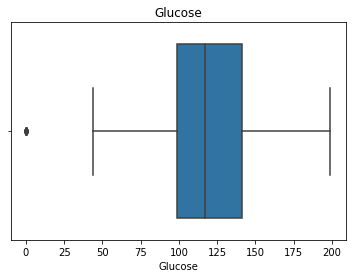

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


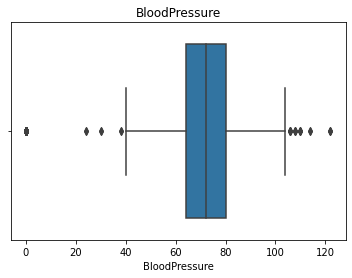

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


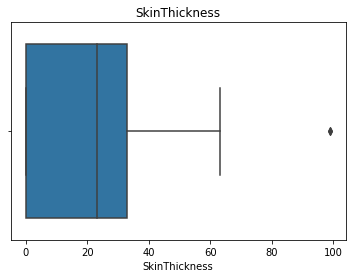

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


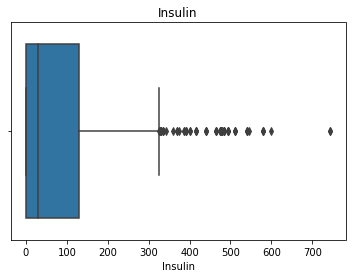

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


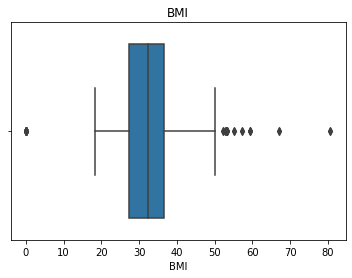

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


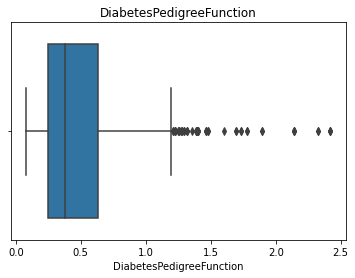

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


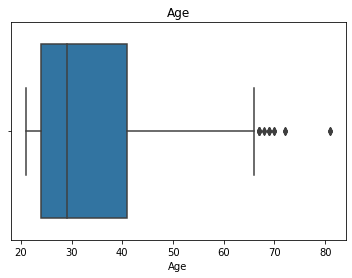

In [13]:
for ft in features:
    data=df.copy()
    sns.boxplot(data[ft])
    plt.title(ft)
    plt.show()

## Handling outliers

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,135,68,42,250,42.3,0.365,24,1
2,0,173,78,32,265,46.5,1.159,58,0
3,4,99,72,17,0,25.6,0.294,28,0
4,8,194,80,0,0,26.1,0.551,67,0


In [15]:
IQR=df['Pregnancies'].quantile(0.75)-df['Pregnancies'].quantile(0.25)
upperbound=df['Pregnancies'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Pregnancies'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

13.5 -6.5


In [16]:
df.loc[df['Pregnancies']>13.5,'Pregnancies']=13.5
df.loc[df['Pregnancies']<-6.5,'Pregnancies']=-6.5

In [17]:
IQR=df['Glucose'].quantile(0.75)-df['Glucose'].quantile(0.25)
upperbound=df['Glucose'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Glucose'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

204.0 36.0


In [18]:
df.loc[df['Glucose']>204,'Glucose']=204
df.loc[df['Glucose']<36,'Glucose']=36

In [19]:
IQR=df['BloodPressure'].quantile(0.75)-df['BloodPressure'].quantile(0.25)
upperbound=df['BloodPressure'].quantile(0.75)+1.5*(IQR)
lowerbound=df['BloodPressure'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

104.0 40.0


In [20]:
df.loc[df['BloodPressure']>104,'BloodPressure']=104
df.loc[df['BloodPressure']<40,'BloodPressure']=40

In [21]:
IQR=df['SkinThickness'].quantile(0.75)-df['SkinThickness'].quantile(0.25)
upperbound=df['SkinThickness'].quantile(0.75)+1.5*(IQR)
lowerbound=df['SkinThickness'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

82.5 -49.5


In [22]:
df.loc[df['SkinThickness']>82.5,'SkinThickness']=82.5
df.loc[df['SkinThickness']<-49.5,'SkinThickness']=-49.5

In [23]:
IQR=df['Insulin'].quantile(0.75)-df['Insulin'].quantile(0.25)
upperbound=df['Insulin'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Insulin'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

325.0 -195.0


In [24]:
df.loc[df['Insulin']>325,'Insulin']=325
df.loc[df['Insulin']<-195,'Insulin']=-195

In [25]:
IQR=df['BMI'].quantile(0.75)-df['BMI'].quantile(0.25)
upperbound=df['BMI'].quantile(0.75)+1.5*(IQR)
lowerbound=df['BMI'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

50.400000000000006 13.599999999999994


In [26]:
df.loc[df['BMI']>50.4,'BMI']=50.4
df.loc[df['BMI']<13.59,'BMI']=13.59

In [27]:
IQR=df['DiabetesPedigreeFunction'].quantile(0.75)-df['DiabetesPedigreeFunction'].quantile(0.25)
upperbound=df['DiabetesPedigreeFunction'].quantile(0.75)+1.5*(IQR)
lowerbound=df['DiabetesPedigreeFunction'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

1.21 -0.33399999999999996


In [28]:
df.loc[df['DiabetesPedigreeFunction']>1.21,'DiabetesPedigreeFunction']=1.21
df.loc[df['DiabetesPedigreeFunction']<-0.3339,'DiabetesPedigreeFunction']=-0.3339

In [29]:
IQR=df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
upperbound=df['Age'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Age'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

66.5 -1.5


In [30]:
df.loc[df['Age']>66.5,'Age']=66.5
df.loc[df['Age']<-1.5,'DiabetesPedigreeFunction']=-1.5

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


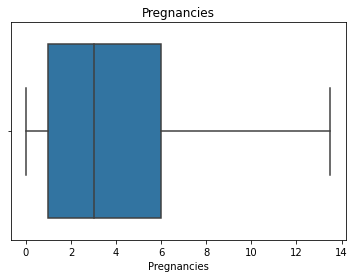

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


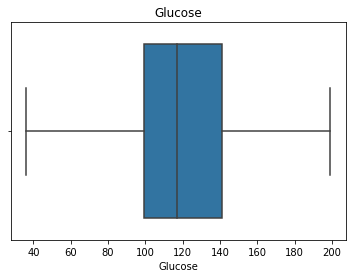

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


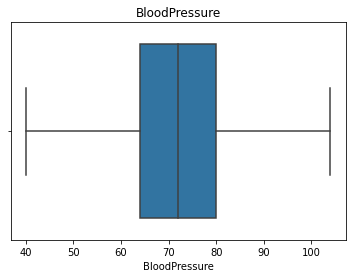

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


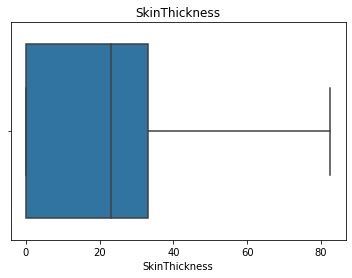

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


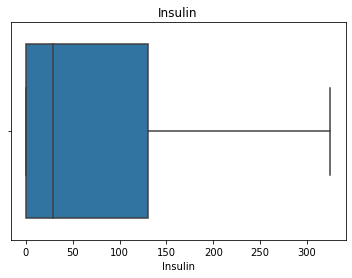

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


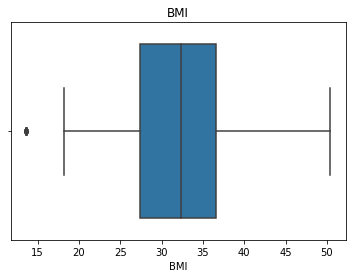

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


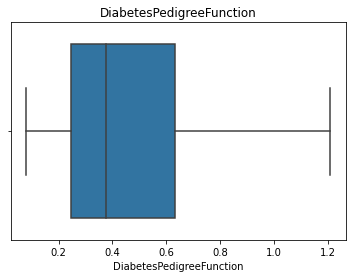

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


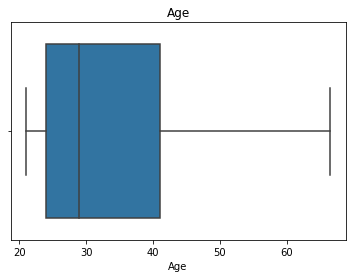

In [31]:
for ft in continuous_feat:
    data=df.copy()
    sns.boxplot(data[ft])
    plt.title(ft)
    plt.show()

In [32]:
from statsmodels.graphics.gofplots import qqplot

Pregnancies


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


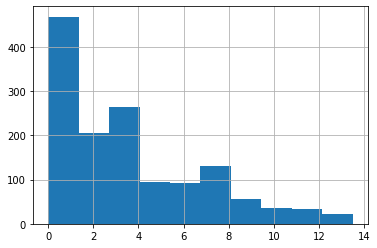

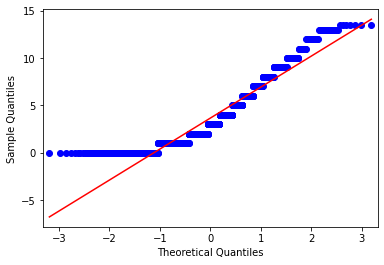

Glucose


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


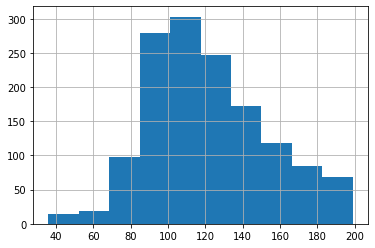

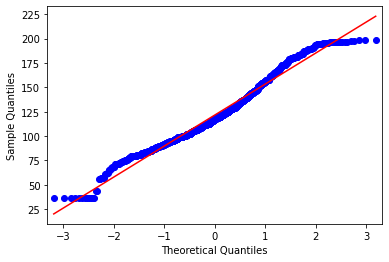

BloodPressure


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


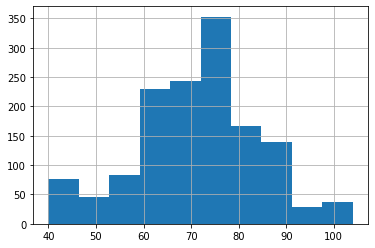

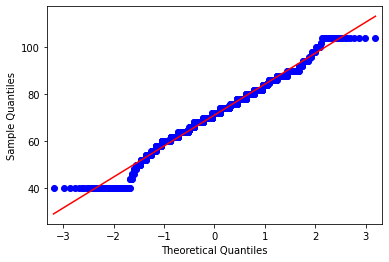

SkinThickness


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


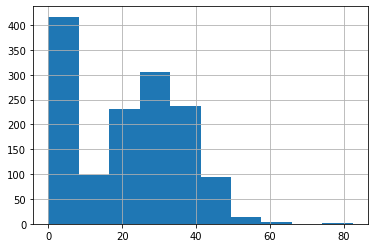

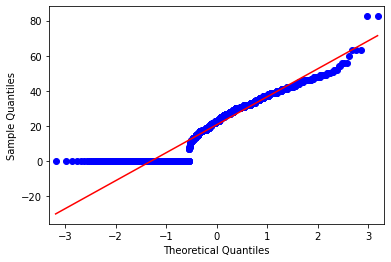

Insulin


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


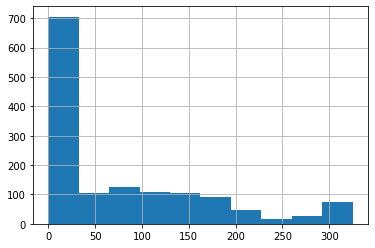

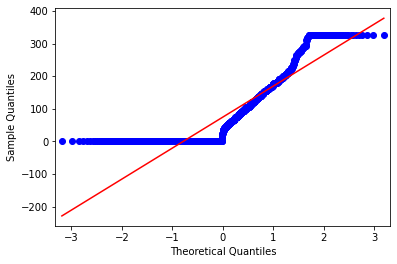

BMI


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


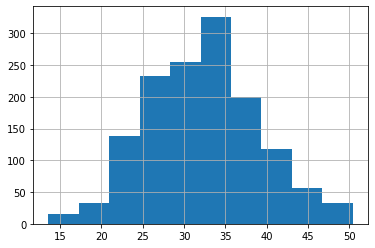

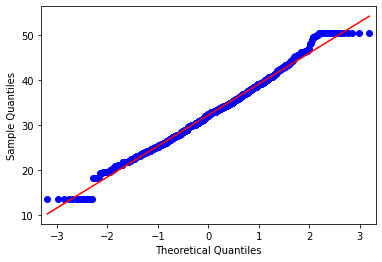

DiabetesPedigreeFunction


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


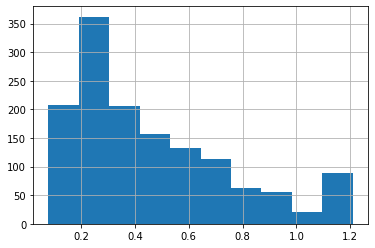

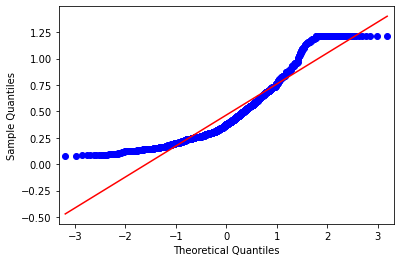

Age


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


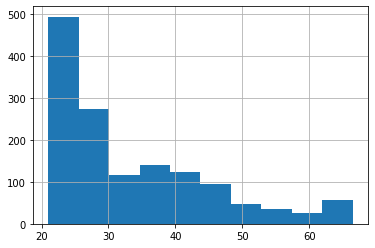

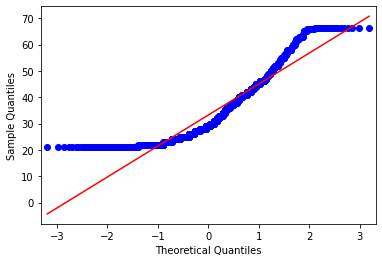

In [33]:
for feature in continuous_feat:
    print(feature)
    df[feature].hist()
    qqplot(df[feature],line='s')
    plt.show()

In [34]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [37]:
X_scaled[0]

array([-0.50869783,  0.51904932, -0.69412065,  0.89893467, -0.7857511 ,
        0.20217027, -1.15158789,  1.16948203])

In [38]:
df_Xscaled=pd.DataFrame(X_scaled,columns=df.columns[:-1])
df_Xscaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.508698,0.519049,-0.694121,0.898935,-0.785751,0.202170,-1.151588,1.169482
1,-1.120747,0.424715,-0.239464,1.339049,1.846082,1.467358,-0.340565,-0.784795
2,-1.120747,1.619612,0.518298,0.710314,2.003992,2.078139,2.365118,2.104136
3,0.103351,-0.707292,0.063641,-0.232789,-0.785751,-0.961221,-0.582509,-0.444921
4,1.327450,2.279950,0.669851,-1.301638,-0.785751,-0.888509,0.293260,2.826369


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_Xscaled,y,test_size=0.3,random_state=0)

In [40]:
y_train

434     0
992     0
349     0
942     0
371     0
       ..
763     0
835     0
1216    0
559     1
684     1
Name: Outcome, Length: 983, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
y_train.value_counts()

0    636
1    347
Name: Outcome, dtype: int64

In [43]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=20)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=20)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred1 = random_forest_model.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[267  15]
 [ 27 113]]
0.9004739336492891
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       282
           1       0.88      0.81      0.84       140

    accuracy                           0.90       422
   macro avg       0.90      0.88      0.89       422
weighted avg       0.90      0.90      0.90       422



In [45]:
sm=SMOTE(random_state=0)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(y_train.value_counts()))
print("The number of classes after fit {}".format(y_train_res.value_counts()))

The number of classes before fit 0    636
1    347
Name: Outcome, dtype: int64
The number of classes after fit 0    636
1    636
Name: Outcome, dtype: int64


In [46]:
rf=RandomForestClassifier(random_state=10)
rf.fit(X_train_res,y_train_res)

RandomForestClassifier(random_state=10)

In [47]:
y_pred2 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[257  25]
 [ 23 117]]
0.8862559241706162
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       282
           1       0.82      0.84      0.83       140

    accuracy                           0.89       422
   macro avg       0.87      0.87      0.87       422
weighted avg       0.89      0.89      0.89       422



In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred3 = logistic_regression.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[239  43]
 [ 68  72]]
0.7369668246445498
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       282
           1       0.63      0.51      0.56       140

    accuracy                           0.74       422
   macro avg       0.70      0.68      0.69       422
weighted avg       0.73      0.74      0.73       422



In [51]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [52]:
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [53]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [54]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=1000)

In [55]:
random_forest=RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=1000)
random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=1000)

In [56]:
y_pred4 = random_forest.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[263  19]
 [ 26 114]]
0.8933649289099526
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       282
           1       0.86      0.81      0.84       140

    accuracy                           0.89       422
   macro avg       0.88      0.87      0.88       422
weighted avg       0.89      0.89      0.89       422



In [57]:
from xgboost import XGBClassifier

In [58]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred5 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[257  25]
 [ 21 119]]
0.8909952606635071
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       282
           1       0.83      0.85      0.84       140

    accuracy                           0.89       422
   macro avg       0.88      0.88      0.88       422
weighted avg       0.89      0.89      0.89       422



In [60]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_res, y_train_res)

SVC()

In [61]:
y_pred6 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[214  68]
 [ 37 103]]
0.7511848341232228
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       282
           1       0.60      0.74      0.66       140

    accuracy                           0.75       422
   macro avg       0.73      0.75      0.73       422
weighted avg       0.77      0.75      0.76       422



### After analysing finally we can conclude random_forest_classifier gives the best result  

In [62]:
import pickle
file=open('random_forest_model.pkl','wb')
pickle.dump(random_forest_model,file)